## Literature Research

### Data sources

http://123.emn.lt/en/
"Since 1990 the number of residents living in Lithuania has dropped by 883 thousand people, which constitutes about 24 percent of the entire population. It is worth noting, that out of the aforementioned number, 177 thousand can be referred to natural causes (birth/death rate), but the vast majority (707 thousand) is due to emigration. Even though in and of itself emigration is not a negative phenomenon, the immense emigration and unproportionally low immigration rates present an array of challenges in Lithuania: the demographic structure is changing (i.e. the population is ageing), the country is starting to lack workforce, brain drain is occurring."

eurostat source has conflicting information with cia Factbook. Maybe not. Eurostat data is "Crude rate of population change represents the ratio, expressed per 1 000 residents, of the increase of population during 2017 (difference between the population on 1 January 2018 and the population on 1 January 2017) to the average population in 2017" and cia factbook is population growth rate compared to the average annual percentage change in populations, resulting from a surplus (or deficit) of births over deaths and the balance of migrants and leaving a country.
https://ec.europa.eu/eurostat/documents/2995521/9063738/3-10072018-BP-EN.pdf/ccdfc838-d909-4fd8-b3f9-db0d65ea457f

https://www.cia.gov/library/publications/the-world-factbook/rankorder/2002rank.html
https://en.wikipedia.org/wiki/List_of_European_countries_by_population_growth_rate

https://www.green-card.com/winner-statistics/?year=2015

https://data.worldbank.org/indicator/SP.POP.TOTL?end=2016&locations=LT&start=1960
Data file last updated 11/14/18

https://tradingeconomics.com/lithuania/remittances

### Articles

https://qz.com/1325640/the-european-countries-that-desperately-need-migrants-to-avoid-demographic-decline-and-those-that-dont/

https://qz.com/817538/lithuania-is-a-rare-country-where-voters-are-less-worried-about-immigration-than-about-emigration/

https://en.delfi.lt/global-lt/emigration-from-lithuania-no-longer-impacted-by-economic-growth.d?id=74256170

https://voxeurop.eu/en/content/article/1498571-good-life-does-not-come-easily-lithuania

https://www.vice.com/en_uk/article/437qgg/lithuanias-emigration-crisis

https://www.eurekalert.org/pub_releases/2017-03/kuot-mls032417.php

https://euobserver.com/opinion/114419

https://www.bloomberg.com/news/articles/2018-04-20/europe-s-depopulation-time-bomb-is-ticking-in-the-baltics

### Important dates

May 1st 2004 Lithuania joined EU <br>
March 11, 1990, gained independence <br>
financial crisis 2007-2008

---

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from altair import datum

In [2]:
%run ../../random-stuff/altair_theme.py

In [3]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Poppins');
</style>

## Lithuania's Population

In [4]:
# data from worldbank 
year = list(range(1960, 2018))
population = [2778550, 2823550, 2863350, 2898950, 2935200, 2971450, 3008050, 3044400, 3078850, 3107321, 
              3139689, 3179041, 3213622, 3244438, 3273894, 3301652, 3328664, 3355036, 3379514, 3397842, 
              3413202, 3432947, 3457179, 3485192, 3514205, 3544543, 3578914, 3616367, 3655049, 3684255, 
              3697838, 3704134, 3700114, 3682613, 3657144, 3629102, 3601613, 3575137, 3549331, 3524238, 
              3499536, 3470818, 3443067, 3415213, 3377075, 3322528, 3269909, 3231294, 3198231, 3162916, 
              3097282, 3028115, 2987773, 2957689, 2932367, 2904910, 2868231, 2827721]
pop = pd.DataFrame({'Year': year, 'Population': population})

# get the slope (i.e. same as difference in this case)
pop['Yearly Change'] = pop.Population.diff()

percent_change = [round(pop['Yearly Change'][1:].tolist()[indx] * 100 / pop.Population[:-1].tolist()[indx], 2) 
                  for indx in range(57)]
pop['Yearly Change (%)'] = [np.nan, *percent_change]

In [5]:
print(max(population), population.index(max(population)))

3704134 31


The maximum was in 1991

In [6]:
pop.head()

,Year,Population,Yearly Change,Yearly Change (%)
0,1960,2778550,NaN,NaN
1,1961,2823550,45000.0,1.62
2,1962,2863350,39800.0,1.41
3,1963,2898950,35600.0,1.24
4,1964,2935200,36250.0,1.25


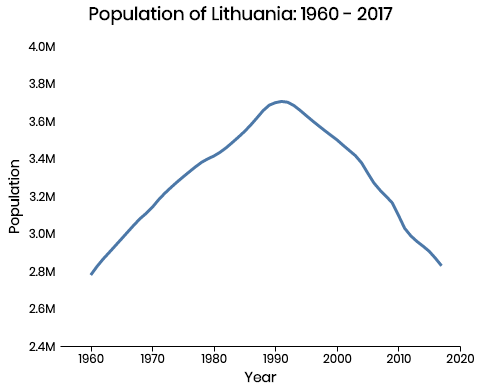

In [10]:
alt.Chart(pop).mark_line().encode(
    x = alt.X('Year', scale = alt.Scale(domain=[1955, 2020]), axis=alt.Axis(format='f', tickCount=6)),
    y = alt.Y('Population:Q', scale = alt.Scale(domain=[2500000, 4000000]), axis=alt.Axis(format='s')),
    tooltip = ['Year', 'Population']
).properties(title="Population of Lithuania: 1960 - 2017")

In [29]:
# make circle dfs
circs_y = [3697838, 3377075, 3198231]
circs_df = pd.DataFrame.from_dict({'x': [1990, 2004, 2008], 'y': circs_y})

circs_ch_y = [13583.0, -38138.0, -33063.0]
circs_ch_df = pd.DataFrame.from_dict({'x': [1990, 2004, 2008], 'y': circs_ch_y})

# make location df for text
text_y = [3800000, 3340000, 3160000]
locs = {'x': [2006, 2001, 2005], 'y': text_y, 
        'text': ['Gained independence in 1990', 'Joined EU in 2004', 'Global financial crisis of 2008']}
loc_df = pd.DataFrame.from_dict(locs)

# make zero line df
zero_line_df = pd.DataFrame.from_dict({'x': [1960, 2017], 'y': [0, 0]})

colors = ['#FFBC42', '#5A8A1D', '#EC2424']
wd = 500
hg = 250

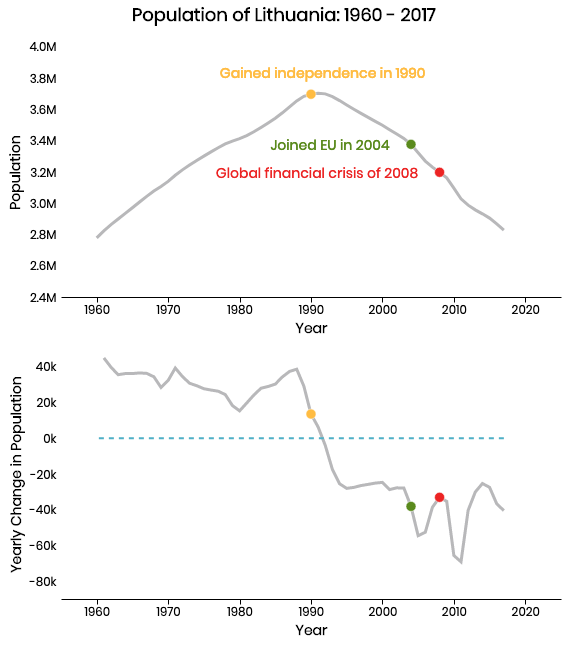

In [30]:
base = alt.Chart(pop).mark_line(color='#b8b8ba').encode(
    x = alt.X('Year', scale = alt.Scale(domain=[1956, 2021]), axis=alt.Axis(format='f', tickCount=6))
)

pop_line = base.encode(
    y = alt.Y('Population:Q', scale = alt.Scale(domain=[2500000, 4000000]), axis=alt.Axis(format='s')),
    tooltip = ['Year', 'Population']
).properties(title="Population of Lithuania: 1960 - 2017", width=wd, height=hg)

circs = alt.Chart(circs_df).mark_circle(size=100, opacity=1.).encode(
    x = 'x',
    y = 'y',
    color = alt.Color('y:N', scale=alt.Scale(domain=circs_y, 
                                             range=colors), legend=None)
)

ind = alt.Chart(loc_df).mark_text().encode(
    x = alt.X('x', axis=alt.Axis(title='Year')),
    y = alt.Y('y', axis=alt.Axis(title='Population')),
    color = alt.Color('y:N', scale=alt.Scale(domain=text_y, 
                                             range=colors), legend=None),
    text = 'text',
    size = alt.value(14)
)


ch_line = base.encode(
    y = alt.Y('Yearly Change:Q', scale = alt.Scale(domain=[-90000.0, 50000.0]), axis=alt.Axis(format='s')),
    tooltip = ['Year', 'Yearly Change']
).properties(width=wd, height=hg)


circs_ch = alt.Chart(circs_ch_df).mark_circle(size=100, opacity=1.).encode(
    x = alt.X('x', axis=alt.Axis(title='Year')),
    y = alt.Y('y', axis=alt.Axis(title='Yearly Change in Population')),
    color = alt.Color('y:N', scale=alt.Scale(domain=circs_ch_y, 
                                             range=colors), legend=None)
)

zero_ln = alt.Chart(zero_line_df).mark_line(color='#4FB0C6', strokeWidth=2, strokeDash=[5, 5]).encode(
    x = 'x',
    y = 'y'
)

(pop_line + circs + ind) & (ch_line + circs_ch + zero_ln)

In [11]:
# make location df for text
locs = {'x': [2015, 2000, 2005], 'y': [3800000, 3200000, 3000000], 
        'text': ['Gained independence in 1990', 'Joined EU in 2004', 'Global financial crisis of 2008']}
loc_df = pd.DataFrame.from_dict(locs)

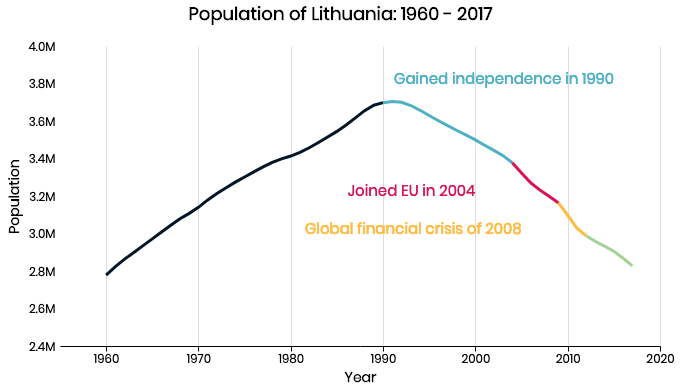

In [12]:
base = alt.Chart(pop).mark_line().encode(
    x = alt.X('Year', scale = alt.Scale(domain=[1955, 2020]), axis=alt.Axis(format='f', tickCount=8, 
                                                                            grid=True)),
    y = alt.Y('Population:Q', scale = alt.Scale(domain=[2500000, 4000000]), axis=alt.Axis(format='s')),
    tooltip = ['Year', 'Population']
)

one = base.mark_line(color='#011627').transform_filter(
    datum.Year <= 1990
)

two = base.mark_line(color='#4FB0C6').transform_filter(
    (datum.Year >= 1990) & (datum.Year <= 2004)
)

three = base.mark_line(color='#D81159').transform_filter(
    (datum.Year >= 2004) & (datum.Year <= 2009)
)

four = base.mark_line(color='#FFBC42').transform_filter(
    (datum.Year >= 2009) & (datum.Year <= 2012)
)

five = base.mark_line(color='#a5d296').transform_filter(
    datum.Year >= 2012
)

ind = alt.Chart(loc_df).mark_text().encode(
    x = alt.X('x', axis=alt.Axis(title='Year')),
    y = alt.Y('y', axis=alt.Axis(title='Population')),
    text = 'text',
    size = alt.value(15), 
    color = alt.Color('y:N', scale=alt.Scale(domain=['3800000', '3200000', '3000000'], 
                                             range=['#4FB0C6', '#D81159', '#FFBC42']), 
                      legend=None)
)

(one + two + three + four + five + ind).properties(title="Population of Lithuania: 1960 - 2017", width=600)

## Migration in Europe

In [13]:
mig_per_year = pd.read_csv('../raw_data/data_from_emn/migration_per_1000.csv')

In [14]:
mig_per_year[:5].append(mig_per_year[-5:])

,Country,Net migration per 1000 residents
0,Luxembourg,19.6
1,Austria,14.2
2,Germany,14.1
3,Ireland,12.6
4,Malta,9.7
23,Cyprus,-2.4
24,Greece,-4.1
25,Croatia,-4.3
26,Latvia,-5.4
27,Lithuania,-7.7


In [15]:
def graph_migration(data: pd.DataFrame, x_feat: str, y_feat: str, title_end: str):
    chart = alt.Chart(data).mark_bar().encode(
        y = alt.Y(x_feat, sort=alt.EncodingSortField(field='Net migration per 1000 residents', 
                                                     op='count', order='descending'), title=''),
        x = alt.X(y_feat),
        color = alt.condition(
            alt.datum[x_feat] == 'Lithuania', 
            alt.value('#FFBC42'),     
            alt.value('#4FB0C6')   
        )
    ).properties(title=f'Countries with the Lowest and Highest {title_end}')
    return chart

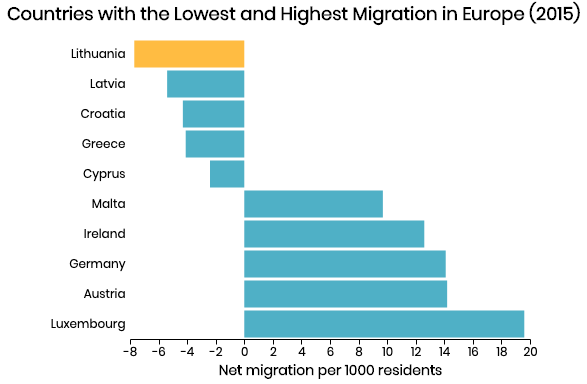

In [16]:
# 2015
graph_migration(mig_per_year[:5].append(mig_per_year[-5:]), 'Country', 'Net migration per 1000 residents', 
                'Migration in Europe (2015)')

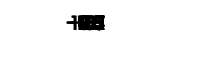

In [17]:
input_dropdown = alt.binding_select(options=mig_per_year.Country.unique().tolist())
selection = alt.selection_single(fields=['Country'], bind=input_dropdown, name='Net migration per 1000 residents for')

alt.Chart(mig_per_year).mark_text(
    fontSize=20
).encode(
    text = 'Net migration per 1000 residents'
).add_selection(selection).transform_filter(
    selection
).properties(height=50, width=200)

In [21]:
mig_eu_2018 = pd.read_csv('../raw_data/eu_pop_2018.csv')
mig_eu_2018 = mig_eu_2018.sort_values('Population change per 1000 residents', ascending=False)

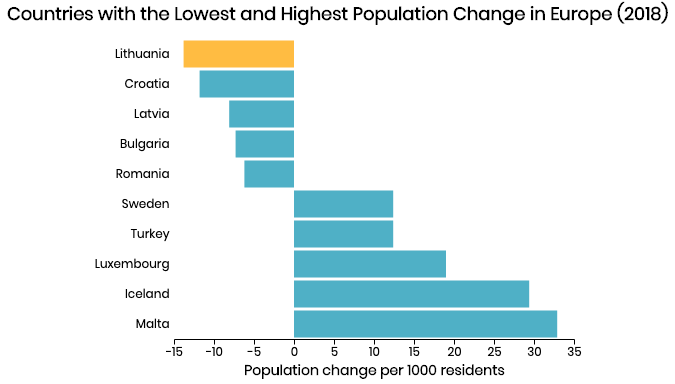

In [39]:
# 2018
graph_migration(mig_eu_2018[:5].append(mig_eu_2018[-5:]), 'Country', 'Population change per 1000 residents', 
                'Population Change in Europe (2018)')

## Population Growth Rate in the World

In [24]:
mig_per_year_world = pd.read_csv('../raw_data/cia_top.csv')

In [25]:
mig_per_year_world

,Country,Population Growth Rate (%)
0,South Sudan,3.83
1,Angola,3.52
2,Malawi,3.31
3,Burundi,3.25
4,Uganda,3.20
5,Niger,3.19
6,Mali,3.02
7,Burkina Faso,3.00
8,Zambia,2.93
9,Ethiopia,2.85


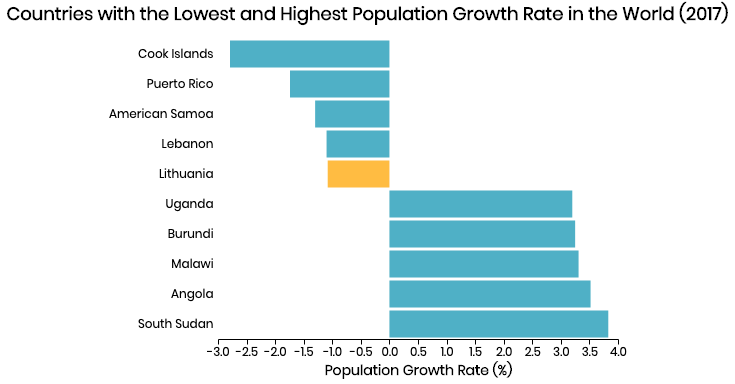

In [26]:
# -1.08 % = 1% less than last year, i.e. net migration per 1000 residents = -10.8 
# 2017
graph_migration(mig_per_year_world[:5].append(mig_per_year_world[-5:]), 'Country', 
                'Population Growth Rate (%)', 'Population Growth Rate in the World (2017)')

## Lithuanian Citizens Abroad

In [32]:
countries = pd.read_csv('../raw_data/data_from_emn/lithuanians_abroad.csv')

In [33]:
countries[:10]

,Country,Number of Lithuanian Citizens (2018)
0,United Kingdom,212000
1,Norway,48000
2,Germany,48000
3,Ireland,36552
4,Spain,25591
5,Denmark,13967
6,Sweden,13659
7,Belarus,7057
8,Netherlands,6476
9,Italy,5161


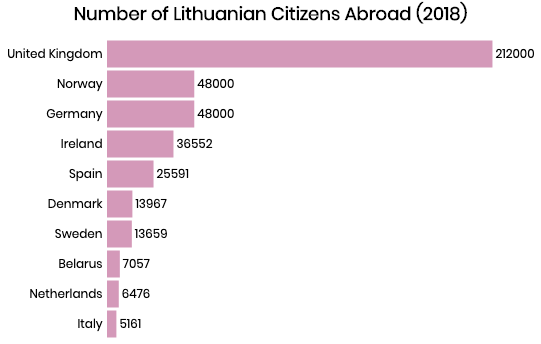

In [37]:
bars = alt.Chart(countries[:10]).mark_bar(color='#D499B9').encode(
    x = alt.X('Number of Lithuanian Citizens (2018)', axis=alt.Axis(ticks=False, domain=False, labels=False), 
              title=''),
    y = alt.Y('Country', sort=alt.EncodingSortField(field='Number of Lithuanian Citizens (2018)', 
                                                    op='count', order='ascending'), title='')
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
    fontSize=12
).encode(
    text='Number of Lithuanian Citizens (2018)'
)

(bars + text).properties(title='Number of Lithuanian Citizens Abroad (2018)')